<a href="https://colab.research.google.com/github/agnaldoseixas/BootCamp_Analise_Dados/blob/main/joins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 18.2 MB/s eta 0:00:00


In [ ]:
import mysql.connector
import pandas as pd

In [ ]:
#Vamos definir os parametros de conexão
host = '34.58.52.179'
user = 'root'
password = ''
database = 'locadora'

In [ ]:
!curl ipecho.net/plain

34.75.146.32

In [ ]:
def consulta(query):
  try:
    connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
    ) # Criando a conexão com o banco locadora
    cursor = connection.cursor() # Criando um cursor que aponta para o banco
    cursor.execute(query) # Executando a query
    result = cursor.fetchall() # Armazenando os resultados da minha consulta
    tabelas = pd.DataFrame(result,columns = cursor.column_names) # Convertendo o resultado para um dataframe
    return tabelas

  except mysql.connector.Error as err:
    print(f'Erro: {err}')
    return None

  finally:
    if cursor:
      cursor.close()
    if connection:
      connection.close()

In [ ]:
query = '''
show tables;
'''
resultado = consulta(query)
display(resultado)

,Tables_in_locadora
0,aluguel
1,carro
2,cliente
3,marca


In [ ]:
query = '''
Select *
From aluguel;
'''
aluguel = consulta(query)
display(resultado)

,Tables_in_locadora
0,aluguel
1,carro
2,cliente
3,marca


In [ ]:
query = '''
Select *
From carro;
'''
carro = consulta(query)
display(carro)

,codcarro,codmarca,modelo,valor
0,1,1,Ka,100.00
1,2,2,Argo,150.00
2,3,3,Onix,170.00
3,4,4,Polo,150.00
4,5,5,Kwid,120.00


In [ ]:
query = '''
Select *
From cliente;
'''
cliente = consulta(query)
display(cliente)

,codcliente,nome,cidade,sexo,estado,estadocivil
0,1,Ana Silva,Duque de Caxias,F,RJ,C
1,2,Bruna Pereira,Niterói,F,RJ,C
2,3,Túlio Nascimento,Duque de Caxias,M,RJ,S
3,4,Fernando Souza,Campinas,M,SP,S
4,5,Lúcia Andrade,São Paulo,F,SP,C


In [ ]:
query = '''
Select *
From marca;
'''
marca = consulta(query)
display(marca)

,codmarca,marca
0,1,Ford
1,2,Fiat
2,3,Chevrolet
3,4,Volkswagen
4,5,Renault


Left Join

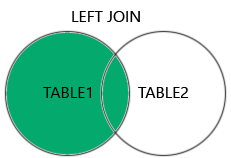

In [ ]:
'''
LEFT JOIN

Quando executamos esse comando, são retornadas todas as linhas da tabela da
esquerda, mesmo que não haja correnpondência na tabela da direita. Caso não tenha
uma correpondência, o SQL preencherá as colunas da tabela da direita com valores
nulos.

SELECT colunas
FROM tabela_esquerda
LEFT JOIN tabela_direita ON tabela_esquerda.coluna_chave = tabela_direita.coluna_chave;

Queremos listar todos os clientes, independente de ter uma data de aluguel ou não.
Além de exibir a data de aluguel daqueles que tem uma correspondência.
'''
query = '''
SELECT cliente.nome, aluguel.data_aluguel
FROM cliente LEFT JOIN aluguel ON cliente.codcliente = aluguel.codcliente;
'''
left_join = consulta(query)
display(left_join)

,nome,data_aluguel
0,Ana Silva,2023-04-05
1,Ana Silva,2023-04-13
2,Ana Silva,2023-04-15
3,Bruna Pereira,2023-04-02
4,Bruna Pereira,2023-04-03
5,Bruna Pereira,2023-04-04
6,Túlio Nascimento,2023-04-01
7,Túlio Nascimento,2023-04-25
8,Fernando Souza,None
9,Lúcia Andrade,2023-04-19


In [ ]:
'''
Usando apelidos para poupar tempo

'''
query = '''
SELECT cl.nome, al.data_aluguel
FROM cliente AS cl
LEFT JOIN aluguel AS al ON cl.codcliente = al.codcliente;
'''
left_join = consulta(query)
display(left_join)

,nome,data_aluguel
0,Ana Silva,2023-04-05
1,Ana Silva,2023-04-13
2,Ana Silva,2023-04-15
3,Bruna Pereira,2023-04-02
4,Bruna Pereira,2023-04-03
5,Bruna Pereira,2023-04-04
6,Túlio Nascimento,2023-04-01
7,Túlio Nascimento,2023-04-25
8,Fernando Souza,None
9,Lúcia Andrade,2023-04-19


Right Join

In [ ]:
'''
Da mesma forma que ocorre no left join, quando não há correspondência para determinada
linha da tabela a direita, o sql vai preencher os valores com NULL.

SELECT colunas
FROM tabela_esquerda
RIGHT JOIN tabela_direita ON tabela_direita.coluna_chave = tabela_esquerda.coluna_chave
'''

query = '''
SELECT cl.nome, al.data_aluguel
FROM cliente AS cl
RIGHT JOIN aluguel AS al ON cl.codcliente = al.codcliente;
'''
right_join = consulta(query)
display(right_join)

,nome,data_aluguel
0,Túlio Nascimento,2023-04-01
1,Bruna Pereira,2023-04-02
2,Bruna Pereira,2023-04-03
3,Bruna Pereira,2023-04-04
4,Ana Silva,2023-04-05
5,Ana Silva,2023-04-13
6,Ana Silva,2023-04-15
7,Lúcia Andrade,2023-04-19
8,Lúcia Andrade,2023-04-21
9,Túlio Nascimento,2023-04-25


In [ ]:
'''
Vamos recuperar todos os carros, mesmo aqueles que nunca foram alugados, usando
RIGHT JOIN.
'''
query = '''
SELECT c.modelo, a.data_aluguel
FROM aluguel AS a
RIGHT JOIN carro AS c ON c.codcarro = a.codcarro;
'''
right_join = consulta(query)
display(right_join)

,modelo,data_aluguel
0,Ka,2023-04-02
1,Ka,2023-04-03
2,Ka,2023-04-15
3,Ka,2023-04-25
4,Argo,2023-04-01
5,Argo,2023-04-19
6,Argo,2023-04-21
7,Onix,2023-04-04
8,Polo,2023-04-05
9,Polo,2023-04-13


# Usando um left join como um right join

In [ ]:
'''
Estamos priorizando a tabela de clientes.
'''
query = '''
SELECT cl.nome, al.data_aluguel
FROM cliente AS cl
LEFT JOIN aluguel AS al ON cl.codcliente = al.codcliente;
'''
left_join = consulta(query)
display(left_join)

,nome,data_aluguel
0,Ana Silva,2023-04-05
1,Ana Silva,2023-04-13
2,Ana Silva,2023-04-15
3,Bruna Pereira,2023-04-02
4,Bruna Pereira,2023-04-03
5,Bruna Pereira,2023-04-04
6,Túlio Nascimento,2023-04-01
7,Túlio Nascimento,2023-04-25
8,Fernando Souza,None
9,Lúcia Andrade,2023-04-19


In [ ]:
'''
Alterando a ordem das tabelas, conseguimos ter o mesmo efeito de uma junção a
direita. Por conta disso, a junção a direita é menos utilizada
'''
query = '''
SELECT cl.nome, al.data_aluguel
FROM aluguel AS al
LEFT JOIN cliente AS cl ON cl.codcliente = al.codcliente;
'''
left_join = consulta(query)
display(left_join)

,nome,data_aluguel
0,Túlio Nascimento,2023-04-01
1,Bruna Pereira,2023-04-02
2,Bruna Pereira,2023-04-03
3,Bruna Pereira,2023-04-04
4,Ana Silva,2023-04-05
5,Ana Silva,2023-04-13
6,Ana Silva,2023-04-15
7,Lúcia Andrade,2023-04-19
8,Lúcia Andrade,2023-04-21
9,Túlio Nascimento,2023-04-25


#INNER JOIN

In [ ]:
'''
No inner join precisamos ter uma correspondência em ambas as tabelas. Não há uma
prioridade na tabela esquerda, nem na da direita.
'''
query = '''
SELECT c.modelo, m.marca
FROM carro AS c
INNER JOIN marca AS m ON m.codmarca = c.codmarca;
'''
inner_join = consulta(query)
display(inner_join)

,modelo,marca
0,Ka,Ford
1,Argo,Fiat
2,Onix,Chevrolet
3,Polo,Volkswagen
4,Kwid,Renault


In [ ]:
'''
Queremos visualizar o nome do cliente e o modelo do carro alugado. Para isso,
vamos precisar realizar dois joins, já que as tabelas não se relacionam diretamente.
'''
query = '''
SELECT cl.nome, ca.modelo, ca.valor, al.data_aluguel
FROM cliente AS cl
JOIN aluguel AS al ON cl.codcliente = al.codcliente
JOIN carro AS ca ON al.codcarro = ca.codcarro;
'''
inner_join = consulta(query)
display(inner_join)

,nome,modelo,valor,data_aluguel
0,Túlio Nascimento,Argo,150.00,2023-04-01
1,Bruna Pereira,Ka,100.00,2023-04-02
2,Bruna Pereira,Ka,100.00,2023-04-03
3,Bruna Pereira,Onix,170.00,2023-04-04
4,Ana Silva,Polo,150.00,2023-04-05
5,Ana Silva,Polo,150.00,2023-04-13
6,Ana Silva,Ka,100.00,2023-04-15
7,Lúcia Andrade,Argo,150.00,2023-04-19
8,Lúcia Andrade,Argo,150.00,2023-04-21
9,Túlio Nascimento,Ka,100.00,2023-04-25


# GAMBIARRA: FULL OUTER JOIN

In [ ]:
'''
O MySQL não possui suporte direto pro full outer join, mas podemos utilizar uma
gambiarra. Par isso, usamos a união de uma junção a esquerda com uma junção a
direita.
'''
query = '''
SELECT cl.nome, al.data_aluguel
FROM cliente AS cl
LEFT JOIN aluguel AS al ON cl.codcliente = al.codcliente

UNION

SELECT cl.nome, al.data_aluguel
FROM cliente AS cl
RIGHT JOIN aluguel AS al ON cl.codcliente = al.codcliente;
'''
inner_join = consulta(query)
display(inner_join)

,nome,data_aluguel
0,Ana Silva,2023-04-05
1,Ana Silva,2023-04-13
2,Ana Silva,2023-04-15
3,Bruna Pereira,2023-04-02
4,Bruna Pereira,2023-04-03
5,Bruna Pereira,2023-04-04
6,Túlio Nascimento,2023-04-01
7,Túlio Nascimento,2023-04-25
8,Fernando Souza,None
9,Lúcia Andrade,2023-04-19
